# Linear regression by gradient descent

To illustrate gradient descent, we make simple linear regression. In linear regression, we want to determine the parameters $a$ and $b$ for the line $$ y= ax+b $$ from a set of $n$ points $x_i,y_i$.

We find the parameters that minimize the mean squared error (the difference between the line and the actual points)
$$
E(a,b) = \frac{1}{n}\sum_i (ax_i+b-y_i)^2
$$

This is normally done using an analytical expression for $a$ and $b$, but here we want to illustrate how it can be done minimizing by gradient descent.



## Data on COVID-19 infections and deaths in Denmark


We use some data for the number of COVID-19 infections and deaths per day in Denmark. To see if there is a linear relation between these in the first wave in 2020.

In [24]:
# These are the libraries used in this  notebook
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
%%bash
# Download data from https://ourworldindata.org/
rm -f owid-covid-data.csv*
wget -q 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
# Extract header and data from Denmark only (using Linux commands)
head -1 owid-covid-data.csv > Covid_Denmark.csv
grep -i denmark owid-covid-data.csv >> Covid_Denmark.csv 
ls -lh

total 51M
-rw-r--r-- 1 root root 318K May 12 05:41 Covid_Denmark.csv
-rw-r--r-- 1 root root  51M May 12 05:41 owid-covid-data.csv
drwxr-xr-x 1 root root 4.0K May  3 13:42 sample_data


In [26]:
# Read file into pandas dataframe and print column names
df = pd.read_csv('Covid_Denmark.csv',parse_dates=['date'])

# You can see column names if you want
#print(df.columns)


In [27]:
# Include only initial corona wave from Mar 2020 to July 2020
# Exclude NAN values
t1 = pd.to_datetime("03-01-2020")
t2 = pd.to_datetime("08-01-2020")
# Select rows which are not NAN in "new_cases" and "new_deaths"
# and in the right date interval
dfe = df[ (df['date']>t1) & (df['date']<t2) & 
         df['new_cases'].notna() & df['new_deaths'].notna() ]


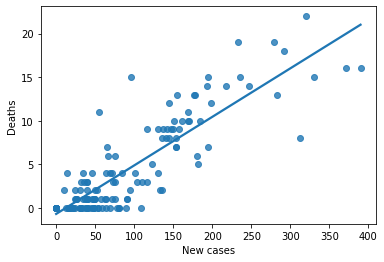

In [28]:
# Extract relevant columns from the data frame into Numpy arrays

x = (dfe['new_cases']*1.0).to_numpy()
y = (dfe['new_deaths']*1.0).to_numpy()

# Seaborn can do linear regression with regplot
sns.regplot(x=x,y=y,ci=None).set(xlabel='New cases',ylabel='Deaths')

plt.show()

## The gradient

By differentiation, the gradient of the error can be calculated (it is not important to understand the math):
$$
\left(\frac{\partial E}{\partial a},\frac{\partial E}{\partial b}\right)
= \left( \frac{2}{n} \sum_i(ax_i+b-y_i)x_i,
\frac{2}{n}\sum_i(ax_i+b-y_i) \right)
$$

Below we made a couple of functions for calculating the errors and the gradients for a set of points.

In [29]:
# These functions take numpy arrays (x and y) and paramters a,b

def linear_function(x,a,b):
  return a*x+b

def mean_squared_error(y,x,a,b):
  ''' Mean squared difference (error) between points and line'''
  n = x.shape[0]
  return np.square(y-linear_function(x,a,b)).sum()/n

def gradient(y,x,a,b):
  n = x.shape[0]
  c = 2*(a*x+b-y)/n
  return (c*x).sum(),c.sum()


## Gradient descent

To illustrate the used of gradient descent minimization, we use it here to find the two parameters for linear regression.

Epoch: 3 Error: 16.675525272248034
Epoch: 6 Error: 8.375527211646874
Epoch: 9 Error: 7.487653603498865
Epoch: 12 Error: 7.39266577890016
Epoch: 15 Error: 7.382494105671681
Epoch: 18 Error: 7.381395340656212
Final epoch 20 Error : 7.381267118460204


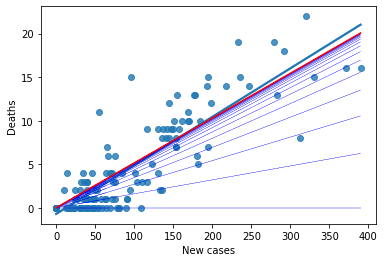

In [34]:

# An epoch is one step/round of gradient descent
# This is the number of rounds we do:
nepochs=20

# Start values for the two paramters
a=0.0
b=0.0

# The step size for gradient descent (1.e-5 gives a nice illustration)
learn_rate = 1.e-5

# Same plot as above with the correct regression line
plot = sns.regplot(x=x,y=y,ci=None).set(xlabel='New cases',ylabel='Deaths')

for epoch in range(nepochs):
  # Plot the line resulting from the current values of a and b
  plt.plot(x,linear_function(x,a,b),color="blue", linewidth=0.2)
  # This is very slow: sns.lineplot(x=x,y=linear_function(x,a,b),color="blue")
  # The error
  err = mean_squared_error(y,x,a,b)
  # Calculate gradient
  da,db=gradient(y,x,a,b)
  # Change parameters by gradient descent
  a -= learn_rate*da
  b -= learn_rate*db
  # b converges VERY slowly. You can use b -= 10000*learn_rate*db to speed up
  if (epoch+1) % 3==0:
    print("Epoch:",epoch+1,"Error:",err)

err = mean_squared_error(y,x,a,b)
print("Final epoch",epoch+1,"Error :",err)

# Plot last line
sns.lineplot(x=x,y=linear_function(x,a,b),color="red")

plt.show()


You can try to change the learning rate. If it is too big, it will go completely wrong, and if it is too small, it will not converge.